<a href="https://colab.research.google.com/github/tanushriskr/ED-Tech_market_segmentation/blob/main/ED_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_district = pd.read_csv('/content/2015_16_Districtwise.csv')
df_stat_el = pd.read_csv('/content/2015_16_Statewise_Elementary.csv')
df_stat_sec = pd.read_csv('/content/2015_16_Statewise_Secondary.csv')

In [ ]:
df_district.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10,2379.0,135672.0,72701.0,1107,818,2,14,2,84,49,0,2076,980,697,1,14,2,49,49,0,1792,...,0,0,0,0,0,0,78,26,104,35,2,37,6,0,6,86,4,92,33,453,57,59116,11,9749,46949,27,7534,27433,27,3472,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35,4243.0,117874.0,70952.0,1215,825,9,11,5,176,69,0,2310,1108,639,1,11,5,96,69,0,1929,...,0,0,0,0,0,0,118,90,208,63,32,95,5,1,6,122,2,222,98,313,40,53237,0,4406,38161,0,3801,26138,0,1763,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95,1979.0,113560.0,62397.0,258,417,36,2,0,263,9,0,985,203,209,1,2,0,65,9,0,489,...,0,0,0,0,0,0,59,216,275,85,151,236,11,12,23,14,0,81,36,375,54,13624,227,1266,15286,276,1251,6370,34,429,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56,1361.0,118477.0,58838.0,755,537,10,10,1,98,57,0,1468,697,423,1,10,1,40,57,0,1229,...,0,0,0,0,0,0,100,41,141,44,9,53,0,0,0,41,1,62,20,143,18,37707,0,3098,27383,0,2411,17795,18,1052,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41,1086.0,64493.0,30166.0,532,339,4,14,2,94,43,0,1028,497,233,0,14,2,23,43,0,812,...,0,0,0,0,0,0,83,32,115,46,7,53,3,0,3,15,1,17,8,37,9,20123,132,2775,16660,44,2531,9438,62,1004,7408,17,855,1688,2584,151,67,5,1101,209


In [ ]:
df_stat_el.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,1436,2127,...,0,0,0,0,0,0,665604,61070,167781,486933,44904,123864,321576,34985,65079,229227,25588,47051,1933,1428,3361,816,530,1346,75,22,97,915,61,2173,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,610,793,...,0,0,0,0,0,0,329673,122825,20439,319435,119118,19561,300370,113339,22577,332815,116201,23289,1316,918,2234,85,94,179,14,14,28,521,386,442,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14371,2582,2593,2864,1754,2743,1869,0,28776,13250,328,309,2858,1631,283,1829,0,20488,921,1916,...,389,0,0,0,89,0,1168711,755477,1043,1002514,717693,983,911360,582104,1374,637313,450571,1091,2321,4034,6355,1479,2277,3756,260,455,715,3687,1241,3668,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,29,85,0,5,70,0,0,201,7,12,42,0,2,52,0,0,115,4,12,...,0,0,0,0,0,0,59945,6520,46,57242,6330,34,44236,6456,25,42094,6330,27,43,275,318,37,143,180,7,24,31,0,0,147,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15497,1584,487,3433,1600,164,895,0,23660,12599,17,46,2806,1245,9,783,0,17505,2654,1457,...,0,1304,0,0,0,0,477117,165623,13868,423433,158811,12398,313326,103971,10992,243224,85782,9204,2253,1220,3473,2263,1205,3468,798,360,1158,1945,786,1956,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [ ]:
df_stat_sec.head()

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,literacy_rate,male_literacy_rate,female_literacy_rate,distcd,blkcd,villages,clusters,schools,sch_1,sch_2,sch_3,sch_4,sch_5,sch_6,sch_7,sch_r_1,sch_r_2,sch_r_3,sch_r_4,sch_r_5,sch_r_6,sch_r_7,sch_u_1,sch_u_2,sch_u_3,sch_u_4,sch_u_5,sch_u_6,sch_u_7,enr_1,...,tchpg_p_m,tchphd_p_m,tchpd_p_m,tchnr_p_m,tchug_p_f,tchgrad_p_f,tchpg_p_f,tchphd_p_f,tchpd_p_f,tchnr_p_f,tchug_p_nr,tchgrad_p_nr,tchpg_p_nr,tchphd_p_nr,tchpd_p_nr,tchnr_p_nr,tchbtt_m,tchbed_m,tchmed_m,tchoth_m,tchse_m,tchnr_m,tchbtt_f,tchbed_f,tchmed_f,tchoth_f,tchse_f,tchnr_f,tchbtt_nr,tchbed_nr,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,68.74,78.26,58.01,22,201,7263,1628,4202,486,95,2693,414,34,478,2,264,90,2012,376,30,346,0,222,5,681,38,4,132,2,116698,...,55.0,7.0,0.0,0.0,0.0,8.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102,13098,1441,59,43,3555,150,8394,1451,44,32,2906,0,0,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,83.78,90.83,76.60,12,124,10120,2243,3782,565,1634,684,884,2,4,9,418,1543,565,869,2,1,6,147,91,119,15,0,3,3,84525,...,264.0,13.0,0.0,0.0,16.0,94.0,197.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645,12408,1031,1839,528,751,457,10232,790,1001,345,518,0,0,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,76.68,81.48,71.34,22,146,13195,1782,9171,2593,1754,2743,1869,6,63,143,1323,1390,1353,1722,4,38,57,1270,364,1390,147,2,25,86,613610,...,38.0,5.0,0.0,0.0,5.0,52.0,104.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,704,17423,2301,2897,1297,865,1250,40770,4434,4365,1534,3277,0,0,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,86.43,90.54,81.38,1,20,84,20,160,85,5,70,0,0,0,0,9,0,5,0,0,0,0,76,5,65,0,0,0,0,61622,...,1.0,2.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,581,146,87,34,14,30,2220,564,155,71,36,0,0,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,79.63,88.33,70.70,13,95,11989,995,3512,487,1600,164,895,235,116,15,274,1399,105,855,216,90,9,213,199,59,40,19,26,6,179781,...,983.0,2.0,1.0,1.0,10.0,56.0,752.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,797,20539,776,893,336,972,405,9245,408,363,131,526,0,0,0,0,0,0,193393,193890,197590,200769,150799,162100


In [ ]:
print('Shape of all 3 datasets:\n')
print(df_district.shape)
print(df_stat_el.shape)
print(df_stat_sec.shape)

Shape of all 3 datasets:

(680, 819)
(36, 816)
(36, 630)


In [ ]:
print('Unique states in the dataset:')
print(df_district['STATNAME'].nunique())
print(df_district['STATNAME'].unique())

Unique states in the dataset:
36
['JAMMU & KASHMIR' 'HIMACHAL PRADESH' 'PUNJAB' 'CHANDIGARH' 'UTTARAKHAND'
 'HARYANA' 'DELHI' 'RAJASTHAN' 'UTTAR PRADESH' 'BIHAR' 'SIKKIM'
 'ARUNACHAL PRADESH' 'NAGALAND' 'MANIPUR' 'MIZORAM' 'TRIPURA' 'MEGHALAYA'
 'ASSAM' 'WEST BENGAL' 'JHARKHAND' 'ODISHA' 'CHHATTISGARH'
 'MADHYA PRADESH' 'GUJARAT' 'DAMAN & DIU' 'DADRA & NAGAR HAVELI'
 'MAHARASHTRA' 'ANDHRA PRADESH' 'KARNATAKA' 'GOA' 'LAKSHADWEEP' 'KERALA'
 'TAMIL NADU' 'PUDUCHERRY' 'A & N ISLANDS' 'TELANGANA']


In [ ]:
print('Unique districts in the dataset:')
print(df_district['DISTNAME'].nunique())
print(df_district['DISTNAME'].unique())

Unique districts in the dataset:
680
['KUPWARA' 'BARAMULA' 'SRINAGAR' 'BADGAM' 'PULWAMA' 'ANANTNAG'
 'LEH (LADAKH)' 'KARGIL' 'DODA' 'UDHAMPUR' 'PUNCH' 'RAJAURI' 'JAMMU'
 'KATHUA' 'SHOPIAN' 'BANDIPORA' 'KISHTWAR' 'RAMBAN' 'GANDERBAL' 'KULGAM'
 'REASI' 'SAMBA' 'CHAMBA' 'KANGRA' 'LAHUL & SPITI' 'KULLU' 'MANDI'
 'HAMIRPUR (H.P.)' 'UNA' 'BILASPUR (H.P.)' 'SOLAN' 'SIRMAUR' 'SHIMLA'
 'KINNAUR' 'GURDASPUR' 'AMRITSAR' 'KAPURTHALA' 'JALANDHAR' 'HOSHIARPUR'
 'NAWANSHAHR' 'RUPNAGAR' 'FATEHGARH SAHIB' 'LUDHIANA' 'MOGA' 'FIROZPUR'
 'MUKTSAR' 'FARIDKOT' 'BATHINDA' 'MANSA' 'SANGRUR' 'PATIALA' 'MOHALI'
 'TARAN TARAN' 'BARNALA' 'Fazilka' 'PATHANKOT' 'CHANDIGARH' 'UTTARKASHI'
 'CHAMOLI' 'RUDRAPRAYAG' 'TEHRI GARHWAL' 'DEHRADUN' 'GARHWAL'
 'PITHORAGARH' 'BAGESHWAR' 'ALMORA' 'CHAMPAWAT' 'NAINITAL'
 'UDHAM SINGH NAGAR' 'HARDWAR' 'PANCHKULA' 'AMBALA' 'YAMUNANAGAR'
 'KURUKSHETRA' 'KAITHAL' 'KARNAL' 'PANIPAT' 'SONIPAT' 'JIND' 'FATEHABAD'
 'SIRSA' 'HISAR' 'BHIWANI' 'ROHTAK' 'JHAJJAR' 'MAHENDRAGARH' 'REWARI'
 'GU

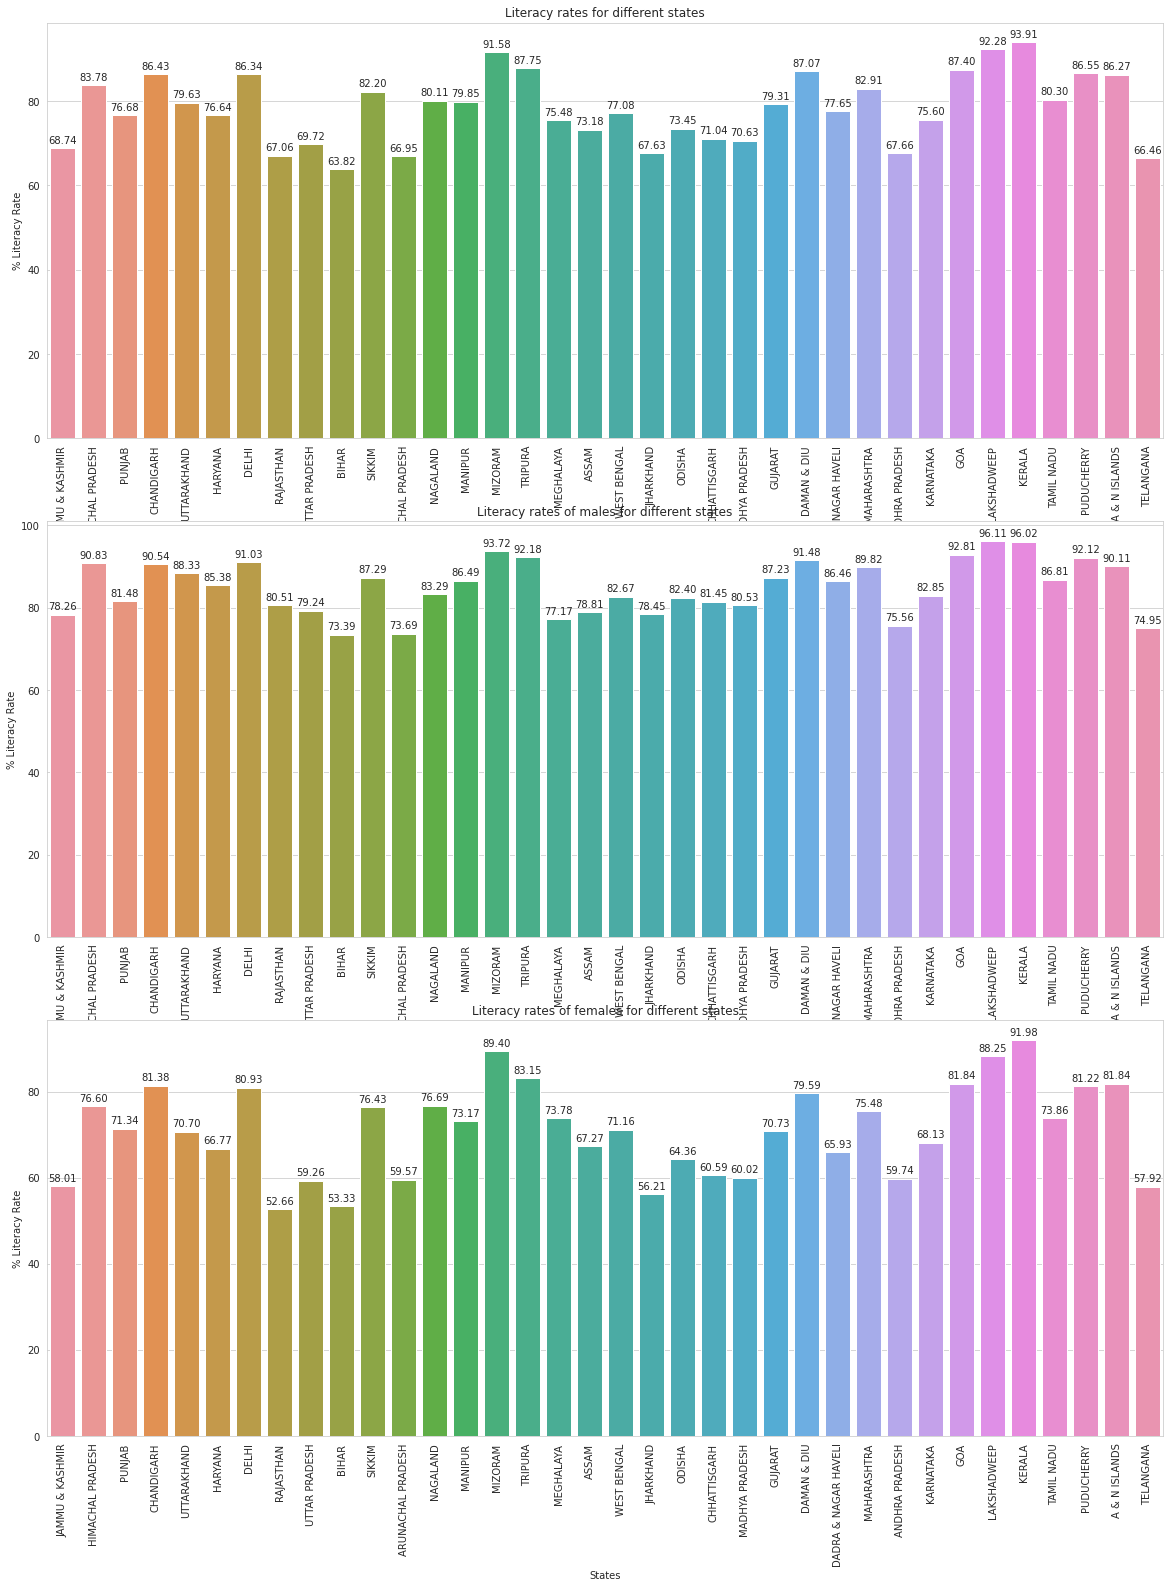

In [ ]:
plt.figure(figsize=(20,26))
plt.subplot(3,1,1)
plots = sns.barplot(x='STATNAME',y='OVERALL_LI',data=df_stat_el)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')
plt.title('Literacy rates for different states')
plt.ylabel('% Literacy Rate')
plt.xlabel('States')
plt.xticks(rotation=90)

plt.subplot(3,1,2)
plots = sns.barplot(x='STATNAME',y='MALE_LIT',data=df_stat_el)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')
plt.title('Literacy rates of males for different states')
plt.ylabel('% Literacy Rate')
plt.xlabel('States')
plt.xticks(rotation=90)

plt.subplot(3,1,3)
plots = sns.barplot(x='STATNAME',y='FEMALE_LIT',data=df_stat_el)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')
plt.title('Literacy rates of females for different states')
plt.ylabel('% Literacy Rate')
plt.xlabel('States')
plt.xticks(rotation=90)

plt.show()

States with highest and lowest literacy rates
secondary and elementary have same literacy rates stats

Male vs Female vs Literacy rate comparison

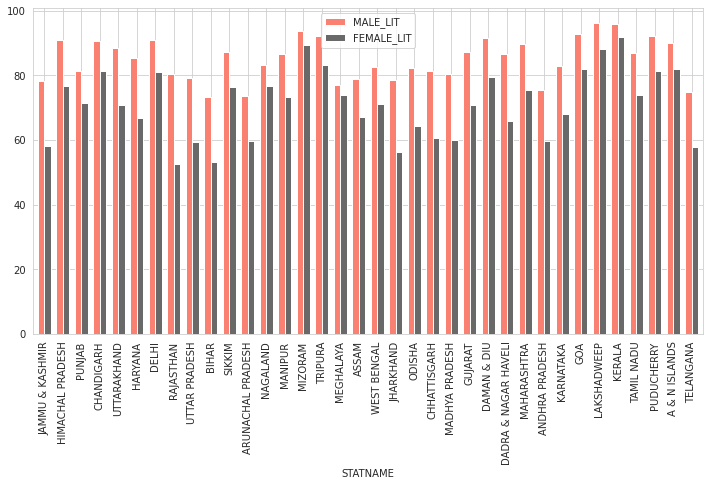

In [ ]:
df_stat_el.plot(kind = 'bar',x = 'STATNAME',y = ['MALE_LIT','FEMALE_LIT'],stacked = False,figsize=(12,6),width = 0.7,color = ['salmon','dimgrey'])

The states with the highest overall literacy rates are : Kerala, Lakshwadeep, Mizoram, Tripura and Goa.
The states with the lowest overall literacy rates are : Bihar, Telngana, Arunachal Pradesh, Rajasthan and Jharkhand.

Analysis between the 3 top most literacy rate states and 3 bottom most literacy rate states.
Creating a dataframe top_bottom containing only top3 and botton 3 states with respect to literacy rates.

6 states taken are : Kerala,Lakshadweep,Mizoram,Bihar,Arunachal Pradesh,Rajasthan

Finding difference in literacy rates between male and female in different states


In [ ]:
# Difference in Male and Female literacy rates
df_stat_el['DIFF_LIT'] = df_stat_el.MALE_LIT - df_stat_el.FEMALE_LIT 

In [ ]:
# Average difference in literacy rates
diff_lit_mean = df_stat_el.DIFF_LIT.mean()
print("India's avg difference in literacy rate between men and women is : {}".format(diff_lit_mean))

India's avg difference in literacy rate between men and women is : 13.89361111111111


In [ ]:
def sort_vals(df,col):
    '''
    sorts values according to the column provided in ascending order and returns a dataframe with 
    index reset
    
    INPUT:
    df - dataframe to be sorted
    col - column to be sorted on
    
    OUTPUT:
    df_new - sorted dataframe with index reset
    
    '''
    df_new = df.sort_values(by = col)
    df_new.reset_index().drop('index', axis = 1, inplace = True)
    return df_new

In [ ]:
# States with the least male and female literacy rates difference
sort_vals(df_stat_el, 'DIFF_LIT').head()[['STATNAME','DIFF_LIT']]

,STATNAME,DIFF_LIT
16,MEGHALAYA,3.39
31,KERALA,4.04
14,MIZORAM,4.32
12,NAGALAND,6.60
30,LAKSHADWEEP,7.86


In [ ]:
#Dropping Telangana from bottom 3
top_3_elem = df_stat_el.sort_values(by = 'OVERALL_LI', ascending = False).head(3)
bottom_3_elem = df_stat_el.sort_values(by = 'OVERALL_LI', ascending = True).head(4).drop(35)

In [ ]:
top_bottom = pd.concat([top_3_elem, bottom_3_elem], axis = 0, sort = False)

In [ ]:
top_bottom

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,DIFF_LIT
31,2015-16,32,KERALA,14,166,1907,1375,33388,24.76,9.95,44.86,1084,9.1,1.5,93.91,91.98,96.02,38863,2586473,1618453,8428,3365,1415,655,1021,1203,371,0,16458,2628,813,415,58,402,203,54,0,4573,4882,1967,...,1327,0,0,0,0,1014144,130330,31413,493505,82087,22188,1121402,135303,29086,502401,78481,19936,405,1067,1472,189,476,665,103,174,277,944,558,2195,1418,3561,675,51419,43025,31335,5327,15449,17752,3936,4.04
30,2015-16,31,LAKSHADWEEP,1,3,10,9,64,41.86,11.00,6.23,946,0.0,94.8,92.28,88.25,96.11,32,5973,3805,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,0,0,...,0,0,0,0,0,4371,0,4336,4356,0,4321,3674,0,3648,3286,0,3269,38,12,50,21,10,31,0,0,0,0,0,1,0,2395,209,139,150,49,15,28,11,0,7.86
14,2015-16,15,MIZORAM,8,36,851,169,1091,40.42,15.17,22.78,975,0.1,94.4,91.58,89.40,93.72,21081,118153,51193,1561,389,0,1122,0,0,0,0,3072,1314,4,0,959,0,0,0,0,2277,245,384,...,0,0,0,0,0,71212,104,70271,63694,47,62921,66221,77,65441,52692,16,52296,307,167,474,208,109,317,1,2,3,189,4,146,98,4917,1386,6593,3267,0,4575,0,0,0,4.32
9,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,25.07,916,15.9,1.3,63.82,53.33,73.39,94163,15017838,6730614,43405,32912,938,292,92,2281,246,0,80166,41790,26794,489,267,58,1854,159,0,71411,579,2350,...,567,0,0,0,0,12775828,2714008,239582,10742347,2320655,208487,5715788,1095589,91620,4655580,881322,76194,6607,2539,9146,7163,2399,9562,986,126,1112,52429,8399,52707,26429,49110,3614,147323,272919,11332,2481,475,23095,927,20.06
11,2015-16,12,ARUNACHAL PRADESH,20,99,2982,234,1383,16.48,14.66,25.92,920,0.0,68.8,66.95,59.57,73.69,83743,174523,77791,2363,1216,67,50,53,224,39,0,4012,2191,955,38,50,52,139,39,0,3464,150,253,...,0,0,0,0,0,137527,836,100822,116108,678,88011,70335,398,51255,58265,156,44135,364,98,462,189,50,239,5,5,10,519,35,319,188,5497,504,8564,9020,820,202,304,2022,206,14.12
7,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,21.44,926,17.8,13.5,67.06,52.66,80.51,342239,8238091,4451853,42577,37428,15297,228,1176,10827,398,0,107931,35740,21027,8751,208,707,4025,206,0,70664,4789,16092,...,387,0,0,518,0,3850769,943210,906653,76534,13176,36594,1877561,474560,377119,38054,12271,9833,11041,4412,15453,5637,2348,7985,430,290,720,18310,2804,21127,11705,40162,2701,125798,253514,120330,979,5189,86126,1720,27.85


Exploring features that might affect Literacy Rates

1) Total Population

In [ ]:
top_bottom.TOTPOPULAT/top_bottom.AREA_SQKM * 1000

31     859.120500
30    2000.000000
14      51.752763
9     1102.396907
11      16.514813
7      200.506079
dtype: float64

It is evident that population density doesn't affect the literacy rates . there doesn't seem to be any paticular trend between the top 3 most and bottom 3 most states. 

2) Using feature DIFF_LIT that is difference in literacy rates of Male and Female

In [ ]:
top_bottom.DIFF_LIT

31     4.04
30     7.86
14     4.32
9     20.06
11    14.12
7     27.85
Name: DIFF_LIT, dtype: float64

Text(0.5, 1.0, 'Top 3 vs Bottom 3 states for DIFF_LIT')

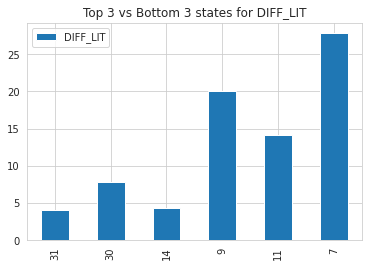

In [ ]:
top_bottom.plot(y = 'DIFF_LIT',kind= 'bar')
plt.title('Top 3 vs Bottom 3 states for DIFF_LIT')

DIFF_LIT says a lot. The differences are really high in states with low overall literacy rates. So even if the bottom most states have good male literacy rates, female literacy rates are really low and that takes their overall literacy rate down. Thus these states really need to work on educating their females and increasing their literacy rate.

3) Using feature P_SC_POP and P_ST_POP

In [ ]:
top_bottom['SC_ST_POP'] = top_bottom.P_SC_POP + top_bottom.P_ST_POP

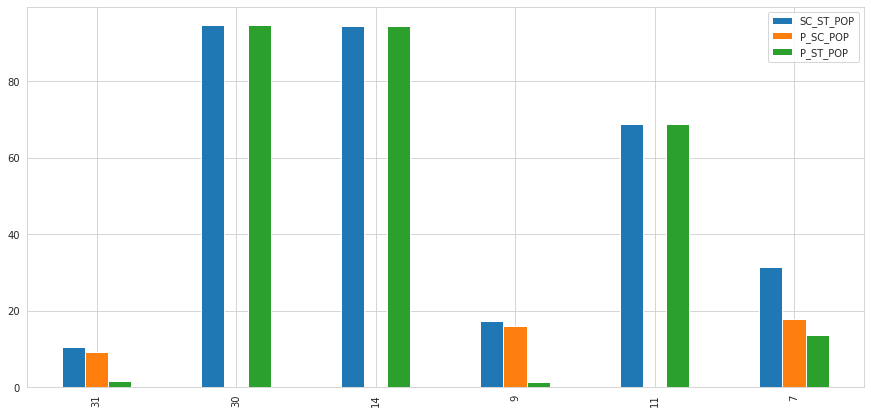

In [ ]:
top_bottom.plot(y = ['SC_ST_POP','P_SC_POP','P_ST_POP'], kind = 'bar', figsize = (15,7))


The overall literacy rate doesn't depend on the SC and ST population proportions because these are very different for all the above states.

P_RUR_POP is created which is 100 - urban population proportion. This will help us in comparing the rural and urban population proportions.

In [ ]:
top_bottom['P_RUR_POP'] = 100 - top_bottom['P_URB_POP']

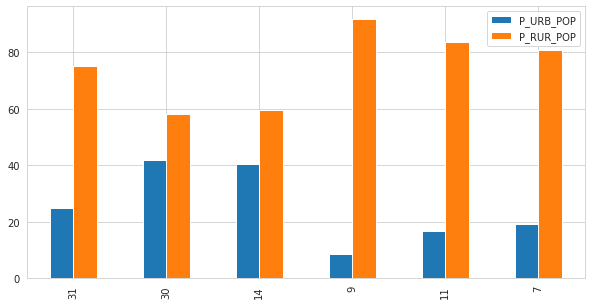

In [ ]:
top_bottom.plot(y = ['P_URB_POP', 'P_RUR_POP'], kind = 'bar', figsize = (10,5))

The difference between rural and urban population is much much bigger in the bottom 3.The rural population percentage in the bottom 3 states is much more than the rural population percentage in the top 3. That's an important factor to note. People living in rural areas lead a very different life compared to the people living in urban areas.Not many children go to school as there isnt much awareness among rural people.Children mostly take up their parents work.

# Extracting relevant features

In [ ]:
features = ['STATNAME','DISTNAME','P_URB_POP','P_SC_POP','P_ST_POP','OVERALL_LI','TOT_6_10_15','TOT_11_13_15',
            'SCHTOTG','SCHTOTP','SCHTOTGR','SCHTOTGA','SCHTOTPR','ENRTOTP','ENRTOTM','ENRTOTGR','ENRTOTPR','CLSTOT']

In [ ]:
data = df_district[features]
data.head()

,STATNAME,DISTNAME,P_URB_POP,P_SC_POP,P_ST_POP,OVERALL_LI,TOT_6_10_15,TOT_11_13_15,SCHTOTG,SCHTOTP,SCHTOTGR,SCHTOTGA,SCHTOTPR,ENRTOTP,ENRTOTM,ENRTOTGR,ENRTOTPR,CLSTOT
0,JAMMU & KASHMIR,KUPWARA,11.33,0.12,8.08,66.92,135672.0,72701.0,1792,284,1749,1792,254,41378,0,84578,33625,10007
1,JAMMU & KASHMIR,BARAMULA,17.19,0.15,3.74,66.93,117874.0,70952.0,1929,381,1796,1929,320,93778,0,84579,75259,12245
2,JAMMU & KASHMIR,SRINAGAR,98.73,0.09,0.72,71.21,113560.0,62397.0,489,496,30,489,19,101784,0,1419,2282,7911
3,JAMMU & KASHMIR,BADGAM,11.74,0.05,3.17,57.98,118477.0,58838.0,1229,237,1194,1229,222,37781,56,55355,32869,7659
4,JAMMU & KASHMIR,PULWAMA,13.80,0.07,4.03,65.00,64493.0,30166.0,812,216,764,812,163,33319,0,26766,21242,5805


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA

In [ ]:
le = LabelEncoder()
data.loc[:,'STATNAME'] = le.fit_transform(data.loc[:,'STATNAME'])
if 'DISTNAME' in data:
  data.drop(columns=['DISTNAME'],inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATNAME,P_URB_POP,P_SC_POP,P_ST_POP,OVERALL_LI,TOT_6_10_15,TOT_11_13_15,SCHTOTG,SCHTOTP,SCHTOTGR,SCHTOTGA,SCHTOTPR,ENRTOTP,ENRTOTM,ENRTOTGR,ENRTOTPR,CLSTOT
0,14,11.33,0.12,8.08,66.92,135672.0,72701.0,1792,284,1749,1792,254,41378,0,84578,33625,10007
1,14,17.19,0.15,3.74,66.93,117874.0,70952.0,1929,381,1796,1929,320,93778,0,84579,75259,12245
2,14,98.73,0.09,0.72,71.21,113560.0,62397.0,489,496,30,489,19,101784,0,1419,2282,7911
3,14,11.74,0.05,3.17,57.98,118477.0,58838.0,1229,237,1194,1229,222,37781,56,55355,32869,7659
4,14,13.80,0.07,4.03,65.00,64493.0,30166.0,812,216,764,812,163,33319,0,26766,21242,5805


In [ ]:
print('Null values in each column')
print(data.isnull().sum())
df = data.dropna()

print('Shape of original data:',data.shape)
print('Shape of new data after dropping records with null values:',df.shape)

Null values in each column
STATNAME         0
P_URB_POP       49
P_SC_POP        47
P_ST_POP        47
OVERALL_LI      46
TOT_6_10_15     46
TOT_11_13_15    46
SCHTOTG          0
SCHTOTP          0
SCHTOTGR         0
SCHTOTGA         0
SCHTOTPR         0
ENRTOTP          0
ENRTOTM          0
ENRTOTGR         0
ENRTOTPR         0
CLSTOT           0
dtype: int64
Shape of original data: (680, 17)
Shape of new data after dropping records with null values: (627, 17)


Performing PCA



Explained variance ratio:
 [7.52442182e-01 2.18892635e-01 1.70509063e-02 8.85538376e-03
 2.29235966e-03 3.52760568e-04 1.07775244e-04 5.46769388e-06
 3.83043337e-07 1.00481600e-07 2.37156496e-08 1.27701764e-08
 6.51707785e-09 1.50558016e-09 5.99543117e-10 4.23509626e-10
 1.56583346e-10]


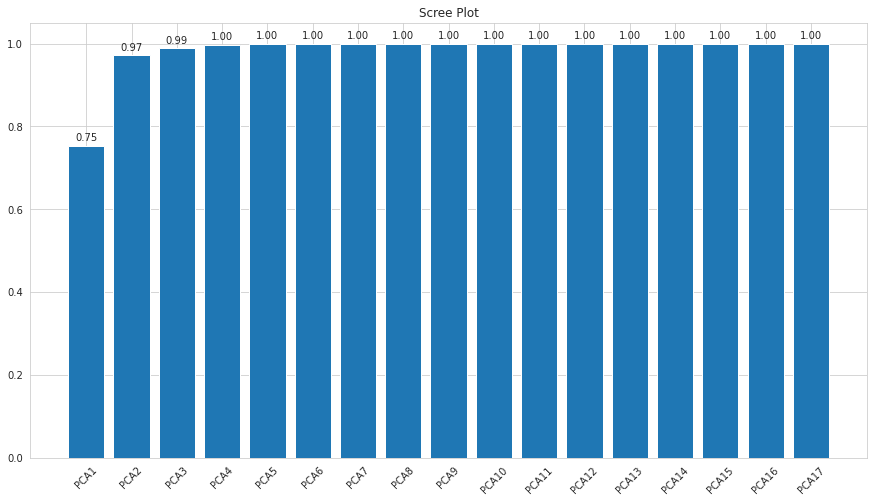

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA()
pca_result = pca.fit_transform(df)
evr = pca.explained_variance_ratio_
print('Explained variance ratio:\n',evr)
titles = ['PCA'+str(i) for i in range(1,df.shape[1]+1)]

plt.figure(figsize=(15,8))
scree_plot = plt.bar(titles,np.cumsum(evr))
plt.xticks(rotation=45)
plt.title('Scree Plot')
for bar in scree_plot:
  plt.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points') 
plt.show()

We can see that the first 2 components represent 96% of the data

In [ ]:
transformed_df = pd.DataFrame(pca_result,columns=titles) 
transformed_df.head() 

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-135942.915789,-23545.847014,18704.257266,-21633.478645,-9195.815531,-7849.255509,4795.441459,-344.348580,-144.947794,-60.174469,24.573114,-9.110788,-2.809629,-6.732065,-14.088906,-9.005196,3.455875
1,-130876.214581,31045.189435,-19185.763462,-4532.704738,-5186.765769,-514.199571,4549.589411,7.200417,-317.696357,27.410736,25.153077,-11.840334,-4.572878,-7.715410,-19.053501,-6.743257,3.201106
2,-200663.424848,43421.800449,64355.307309,15124.834475,-4668.036216,-5052.980581,933.834869,496.999860,-35.839712,229.344294,-83.973993,-8.472944,-19.862161,41.643796,-28.526354,4.393725,0.442168
3,-171624.217603,-15827.499845,20187.947803,-25103.586065,-8004.998304,-11300.367873,3596.260401,-85.596639,-130.508207,-25.115960,17.557803,-14.522952,-9.708157,-10.996751,-17.548840,-2.802485,4.236240
4,-236360.932507,-19983.220281,6870.651609,-7999.263112,-3941.789203,-7232.271103,2326.618940,170.401796,-83.544880,4.224552,3.293621,-13.557189,-15.552526,-10.333804,-14.897213,-6.192783,5.518296


In [ ]:
components_df = pd.DataFrame(pca.components_.T,columns = titles,index=data.columns) 
components_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
STATNAME,0.000004,0.000019,-0.000011,-4.017391e-05,-0.000015,0.000153,0.000422,-0.001106,0.000698,-0.002975,-0.019319,-0.018296,0.005026,0.098934,2.653153e-01,0.280954,0.916592
P_URB_POP,-0.000004,0.000037,0.000192,7.173893e-05,0.000087,0.000326,0.000059,0.003401,-0.004119,0.048741,-0.034682,-0.040997,0.002155,0.935025,-2.842372e-01,0.183867,-0.076404
P_SC_POP,0.000011,0.000010,-0.000005,5.505227e-07,0.000010,0.000186,0.000366,0.000049,-0.006420,-0.015043,-0.003763,-0.054199,-0.229637,0.087109,7.261047e-01,0.516258,-0.377769
P_ST_POP,-0.000047,-0.000031,-0.000055,5.441392e-06,-0.000059,0.000059,-0.000613,0.000392,0.020576,0.014292,-0.004208,0.185753,0.953457,0.027363,1.772057e-01,0.122151,-0.093267
OVERALL_LI,-0.000011,0.000011,0.000042,2.191200e-05,0.000003,0.000535,0.000051,0.000192,-0.000402,0.014685,0.024574,-0.023667,-0.000347,0.319534,5.381317e-01,-0.777567,0.048180
TOT_6_10_15,0.605536,0.126618,0.484022,-3.107581e-01,-0.062497,-0.525110,0.082058,-0.007440,-0.001867,0.002801,-0.000071,-0.000430,0.000199,0.000046,2.251393e-04,-0.000109,-0.000011
TOT_11_13_15,0.368205,0.096588,0.284695,-2.368001e-01,-0.044420,0.829576,-0.166386,0.007387,0.004102,-0.006643,0.000047,0.000995,-0.000262,-0.000067,-3.413653e-04,0.000146,-0.000005
SCHTOTG,0.003407,-0.000051,-0.002367,-3.156251e-03,0.000479,0.038113,0.159621,-0.536142,-0.074741,0.216475,-0.499955,-0.605429,0.116054,-0.052684,2.123175e-03,-0.014425,-0.013733
SCHTOTP,0.000860,0.003000,-0.000493,1.681441e-03,-0.001502,0.002705,0.038049,0.042054,0.779430,-0.023738,-0.540577,0.299935,-0.077642,0.004380,1.133914e-02,-0.017615,-0.003975
SCHTOTGR,0.003196,-0.000088,-0.004693,-2.744651e-03,0.000814,0.027331,0.146516,-0.557393,-0.015304,-0.790858,0.081469,0.177501,-0.020329,0.051515,-1.156245e-02,-0.004610,0.001272


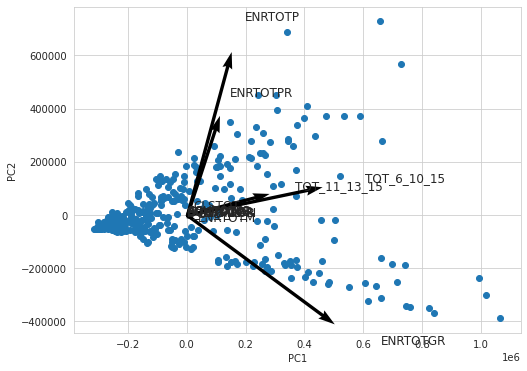

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(pca_result[:,0],pca_result[:,1])
for i in range(len(components_df)):
    b = (components_df.iloc[i,0],components_df.iloc[i,1])
    t_loc = (components_df.iloc[i,0]*1e6,components_df.iloc[i,1]*1e6)
    plt.quiver(0,0,*b,scale=2)
    plt.text(*t_loc, components_df.index[i], fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# K means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import ParameterGrid

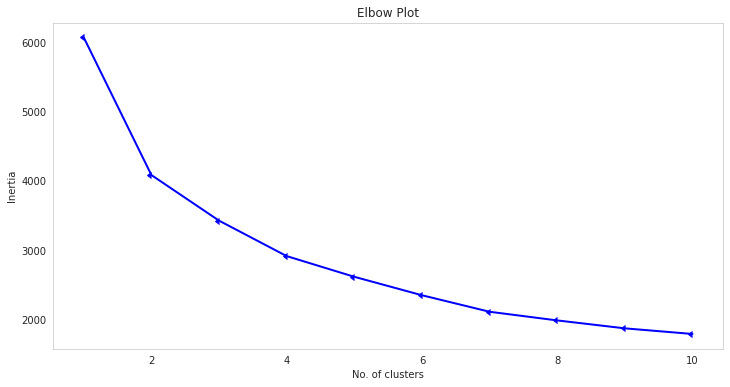

In [ ]:
inertias = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(data_scaled)
  inertias.append(kmeans.inertia_) 
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),inertias,linewidth=2,color="blue",marker=8)
plt.xlabel('No. of clusters')
plt.ylabel("Inertia")
plt.title('Elbow Plot')
plt.show()

In [ ]:
def kmean_hyper_param_tuning(data): 

    parameters = [i for i in range(2,11)]
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()   
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)    
        kmeans_model.fit(data)          

        ss = metrics.silhouette_score(data, kmeans_model.labels_) 
        silhouette_scores.append(ss)     

        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

HyperTuning the Parameter for KMeans
Parameter: {'n_clusters': 2} Score 0.33508338241790586
Parameter: {'n_clusters': 3} Score 0.3303571819641286
Parameter: {'n_clusters': 4} Score 0.24345174288878765
Parameter: {'n_clusters': 5} Score 0.22948300898563634
Parameter: {'n_clusters': 6} Score 0.23402895826303272
Parameter: {'n_clusters': 7} Score 0.23975676495252546
Parameter: {'n_clusters': 8} Score 0.23878649875522587
Parameter: {'n_clusters': 9} Score 0.24088385819589134
Parameter: {'n_clusters': 10} Score 0.23532276376370714


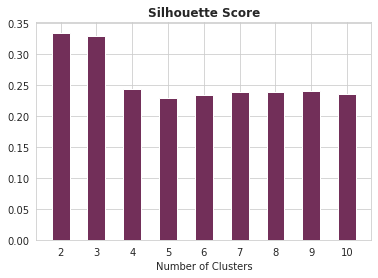

In [ ]:
print("HyperTuning the Parameter for KMeans")
optimum_num_clusters = kmean_hyper_param_tuning(data_scaled)

In [ ]:
clusters = 4
kmeans = KMeans(n_clusters=clusters,init="k-means++")
kmeans.fit(data_scaled)
labels = kmeans.labels_.reshape(-1,1)
pca_df = pd.DataFrame(np.concatenate([pca_result,labels],axis=1),columns=titles+['label'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,label
0,-135942.915789,-23545.847014,18704.257266,-21633.478645,-9195.815531,-7849.255509,4795.441459,-344.348580,-144.947794,-60.174469,24.573114,-9.110788,-2.809629,-6.732065,-14.088906,-9.005196,3.455875,0.0
1,-130876.214581,31045.189435,-19185.763462,-4532.704738,-5186.765769,-514.199571,4549.589411,7.200417,-317.696357,27.410736,25.153077,-11.840334,-4.572878,-7.715410,-19.053501,-6.743257,3.201106,0.0
2,-200663.424848,43421.800449,64355.307309,15124.834475,-4668.036216,-5052.980581,933.834869,496.999860,-35.839712,229.344294,-83.973993,-8.472944,-19.862161,41.643796,-28.526354,4.393725,0.442168,0.0
3,-171624.217603,-15827.499845,20187.947803,-25103.586065,-8004.998304,-11300.367873,3596.260401,-85.596639,-130.508207,-25.115960,17.557803,-14.522952,-9.708157,-10.996751,-17.548840,-2.802485,4.236240,0.0
4,-236360.932507,-19983.220281,6870.651609,-7999.263112,-3941.789203,-7232.271103,2326.618940,170.401796,-83.544880,4.224552,3.293621,-13.557189,-15.552526,-10.333804,-14.897213,-6.192783,5.518296,0.0


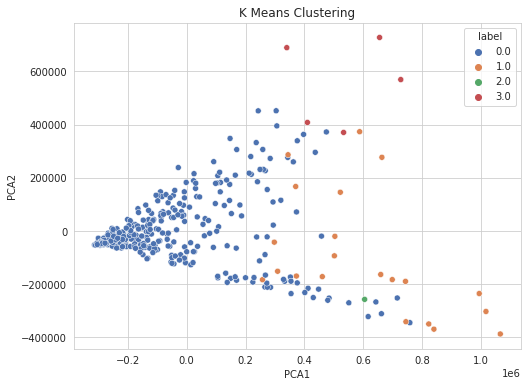

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(x='PCA1',y='PCA2',data=pca_df,hue='label',palette="deep")
plt.title("K Means Clustering")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2',z='PCA3',color='label')
fig.update_layout(title_text='K Means Clustering', title_x=0.5,title_y=0.85)
fig.show()

<h1>Hierarchical Clustering</h1>

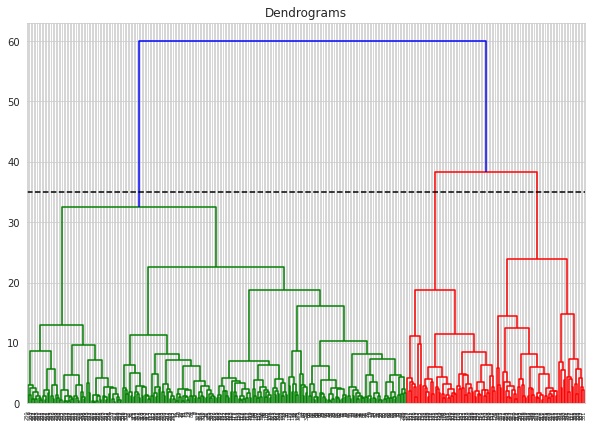

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=35, color='k', linestyle='--')
plt.show()

In [ ]:
def hierarchical_hyper_param_tuning(data):

    parameters = [i for i in range(2,11)]
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    hcp_model = AgglomerativeClustering()
    silhouette_scores = []

    for p in parameter_grid:
        hcp_model.set_params(**p)    
        hcp_model.fit(data)          

        ss = metrics.silhouette_score(data, hcp_model.labels_) 
        silhouette_scores.append(ss)     

        print('Parameter:', p, 'Score', ss)

        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

HyperTuning the Parameter for Hierarchical clustering
Parameter: {'n_clusters': 2} Score 0.31072410801088723
Parameter: {'n_clusters': 3} Score 0.3237175686613052
Parameter: {'n_clusters': 4} Score 0.23577847185963557
Parameter: {'n_clusters': 5} Score 0.24626345914177075
Parameter: {'n_clusters': 6} Score 0.2188275065746763
Parameter: {'n_clusters': 7} Score 0.21278456436237692
Parameter: {'n_clusters': 8} Score 0.20374076230996133
Parameter: {'n_clusters': 9} Score 0.2137684552936675
Parameter: {'n_clusters': 10} Score 0.21593751799723926


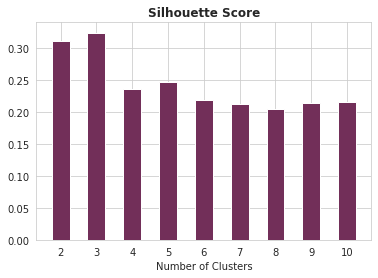

In [ ]:
print("HyperTuning the Parameter for Hierarchical clustering")
hierarchical_hyper_param_tuning(data_scaled)

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hcp=hcluster.fit_predict(data_scaled)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(data_scaled,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(data_scaled,hcp)))

Silhouette Score for Hieararchial Clustering:0.23577847185963557
Davies Bouldin Score:1.3334086944133776


In [ ]:
hcp_labels = hcp.reshape(-1,1)
pca_df = pd.DataFrame(np.concatenate([pca_result,hcp_labels],axis=1),columns=titles+['label'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,label
0,-135942.915789,-23545.847014,18704.257266,-21633.478645,-9195.815531,-7849.255509,4795.441459,-344.348580,-144.947794,-60.174469,24.573114,-9.110788,-2.809629,-6.732065,-14.088906,-9.005196,3.455875,1.0
1,-130876.214581,31045.189435,-19185.763462,-4532.704738,-5186.765769,-514.199571,4549.589411,7.200417,-317.696357,27.410736,25.153077,-11.840334,-4.572878,-7.715410,-19.053501,-6.743257,3.201106,1.0
2,-200663.424848,43421.800449,64355.307309,15124.834475,-4668.036216,-5052.980581,933.834869,496.999860,-35.839712,229.344294,-83.973993,-8.472944,-19.862161,41.643796,-28.526354,4.393725,0.442168,1.0
3,-171624.217603,-15827.499845,20187.947803,-25103.586065,-8004.998304,-11300.367873,3596.260401,-85.596639,-130.508207,-25.115960,17.557803,-14.522952,-9.708157,-10.996751,-17.548840,-2.802485,4.236240,1.0
4,-236360.932507,-19983.220281,6870.651609,-7999.263112,-3941.789203,-7232.271103,2326.618940,170.401796,-83.544880,4.224552,3.293621,-13.557189,-15.552526,-10.333804,-14.897213,-6.192783,5.518296,1.0


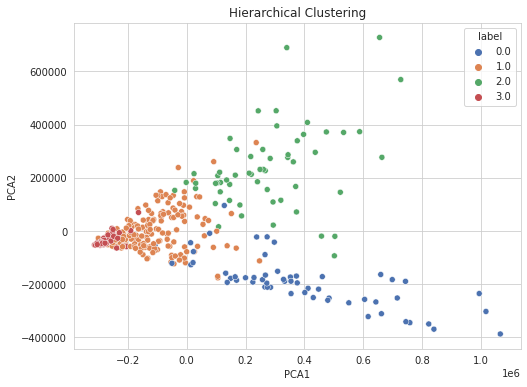

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(x='PCA1',y='PCA2',data=pca_df,hue='label',palette="deep")
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3',color='label')
fig.update_layout(title_text='Hierarchical Clustering', title_x=0.5,title_y=0.8)
fig.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

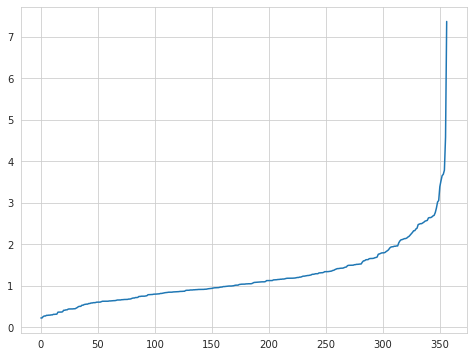

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(8,6))
plt.plot(distances)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=2.5,min_samples=5)
dbs = dbscan.fit_predict(data_scaled)

In [ ]:
list(set(dbs))

[0, -1]

DBSCAN algorithm is not working properly on the dataset as it is a density based algorithm and after visulization it can be seen that our data will not work well for density based algorithms

# MeanShift clustering

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift()
ms_res = ms.fit_predict(data_scaled)
print('Silhouette Score for MeanShift Clustering:'+str(metrics.silhouette_score(data_scaled,ms_res,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(data_scaled,ms_res)))
n_clusters = len(list(set(ms_res)))
print('Number of clusters={}'.format(n_clusters))

Silhouette Score for MeanShift Clustering:0.36015381084249776
Davies Bouldin Score:0.97790654629219
Number of clusters=4


In [ ]:
ms_labels = ms_res.reshape(-1,1)
pca_df = pd.DataFrame(np.concatenate([pca_result,ms_labels],axis=1),columns=titles+['label'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,label
0,-135942.915789,-23545.847014,18704.257266,-21633.478645,-9195.815531,-7849.255509,4795.441459,-344.348580,-144.947794,-60.174469,24.573114,-9.110788,-2.809629,-6.732065,-14.088906,-9.005196,3.455875,0.0
1,-130876.214581,31045.189435,-19185.763462,-4532.704738,-5186.765769,-514.199571,4549.589411,7.200417,-317.696357,27.410736,25.153077,-11.840334,-4.572878,-7.715410,-19.053501,-6.743257,3.201106,0.0
2,-200663.424848,43421.800449,64355.307309,15124.834475,-4668.036216,-5052.980581,933.834869,496.999860,-35.839712,229.344294,-83.973993,-8.472944,-19.862161,41.643796,-28.526354,4.393725,0.442168,0.0
3,-171624.217603,-15827.499845,20187.947803,-25103.586065,-8004.998304,-11300.367873,3596.260401,-85.596639,-130.508207,-25.115960,17.557803,-14.522952,-9.708157,-10.996751,-17.548840,-2.802485,4.236240,0.0
4,-236360.932507,-19983.220281,6870.651609,-7999.263112,-3941.789203,-7232.271103,2326.618940,170.401796,-83.544880,4.224552,3.293621,-13.557189,-15.552526,-10.333804,-14.897213,-6.192783,5.518296,0.0


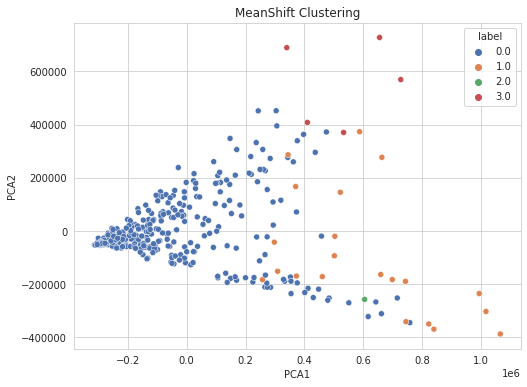

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(x='PCA1',y='PCA2',data=pca_df,hue='label',palette="deep")
plt.title("MeanShift Clustering")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3',color='label')
fig.update_layout(title_text='MeanShift Clustering', title_x=0.5,title_y=0.8)
fig.show()